## Face Morphing

Equation:  𝑀(𝑥𝑚,𝑦𝑚)=(1−𝛼)𝐼(𝑥𝑖,𝑦𝑖)+𝛼𝐽(𝑥𝑗,𝑦𝑗)

𝑥𝑚=(1−𝛼)𝑥𝑖+𝛼𝑥𝑗

𝑦𝑚=(1−𝛼)𝑦𝑖+𝛼𝑦𝑗


### Steps
- Step 1 : Find Point Correspondences using Facial Landmark Detection
- Step 2 : Coordinate Transformation
- Step 3 : Delaunay Triangulation
- Step 4 : Warping images and alpha blending


In [12]:
import sys, os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from dataPath import DATA_PATH

sys.path.append(os.path.join(os.getcwd(), '../week1'))

import faceBlendCommon as fbc
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [13]:
# Landmark model location
PREDICTOR_PATH = DATA_PATH + "models/shape_predictor_68_face_landmarks.dat"

# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [14]:
# Read two images
im1 = cv2.imread(DATA_PATH + "images/hillary-clinton.jpg")
im2 = cv2.imread(DATA_PATH + "images/presidents/bill-clinton.jpg")

In [15]:
# Detect landmarks in both images.
points1 = fbc.getLandmarks(faceDetector, landmarkDetector, im1)
points2 = fbc.getLandmarks(faceDetector, landmarkDetector, im2)

points1 = np.array(points1)
points2 = np.array(points2)

# Convert image to floating point in the range 0 to 1
im1 = np.float32(im1)/255.0
im2 = np.float32(im2)/255.0

In [16]:
# Dimensions of output image
h = 600
w = 600

# Normalize image to output coordinates.
imNorm1, points1 = fbc.normalizeImagesAndLandmarks((h, w), im1, points1)
imNorm2, points2 = fbc.normalizeImagesAndLandmarks((h, w), im2, points2)

In [17]:
# Calculate average points. Will be used for Delaunay triangulation.
pointsAvg = (points1 + points2)/2.0

# 8 Boundary points for Delaunay Triangulation
boundaryPoints = fbc.getEightBoundaryPoints(h, w)
points1 = np.concatenate((points1, boundaryPoints), axis=0)
points2 = np.concatenate((points2, boundaryPoints), axis=0)
pointsAvg = np.concatenate((pointsAvg, boundaryPoints), axis=0)

# Calculate Delaunay triangulation.
rect = (0, 0, w, h)
dt = fbc.calculateDelaunayTriangles(rect, pointsAvg)

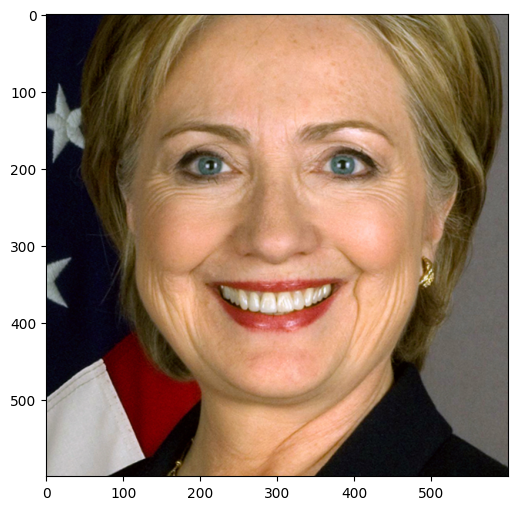

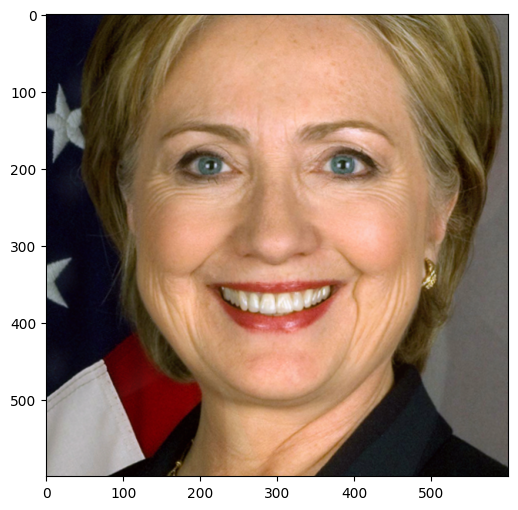

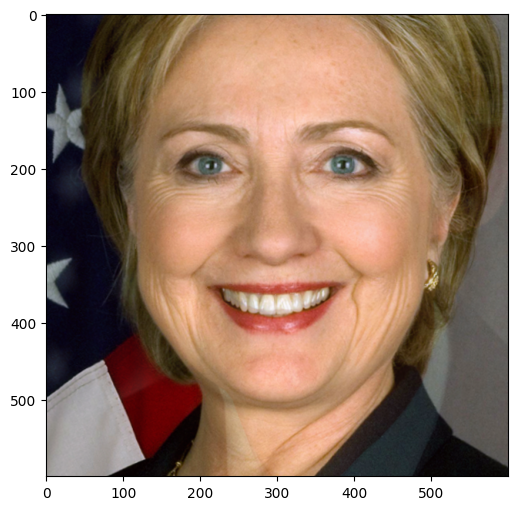

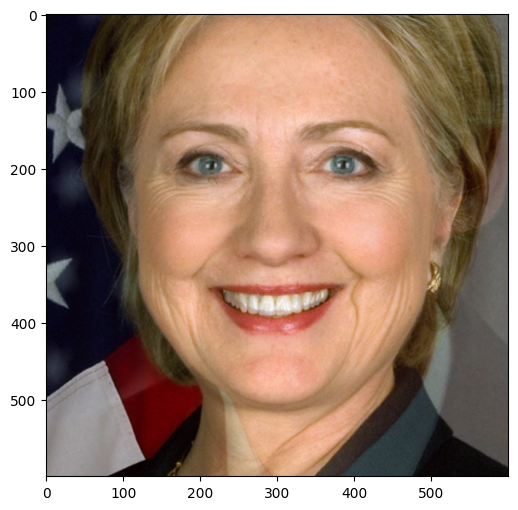

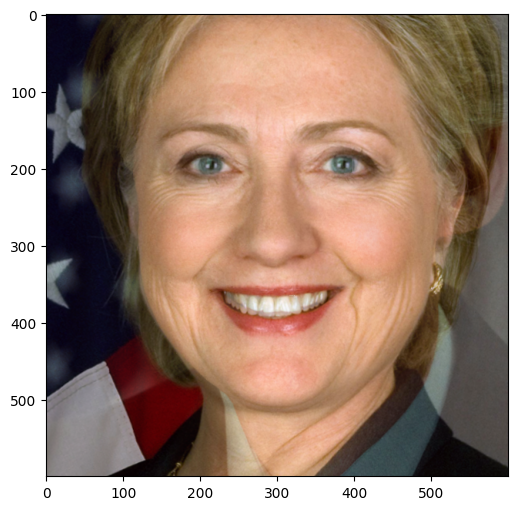

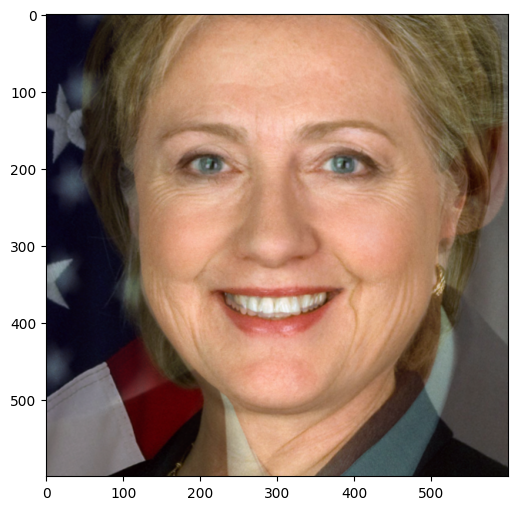

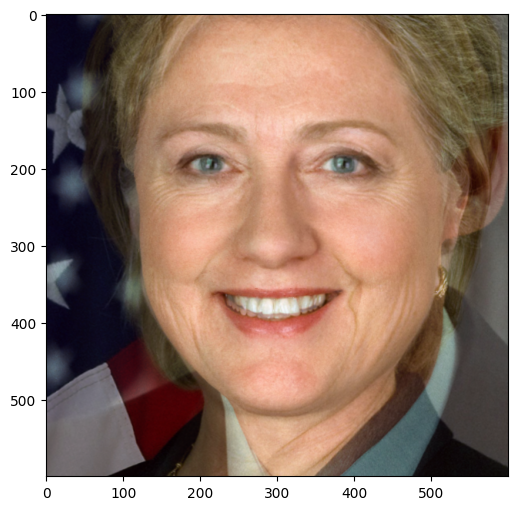

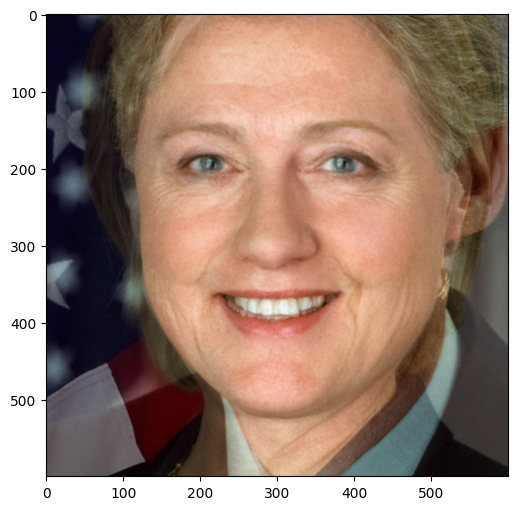

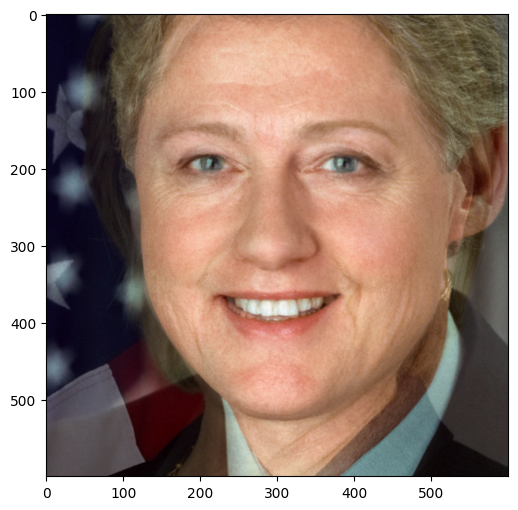

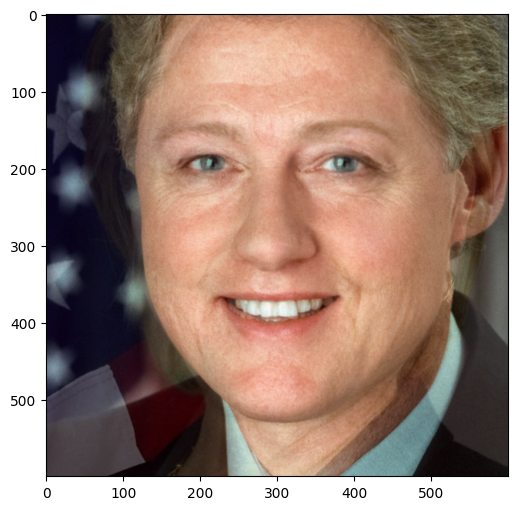

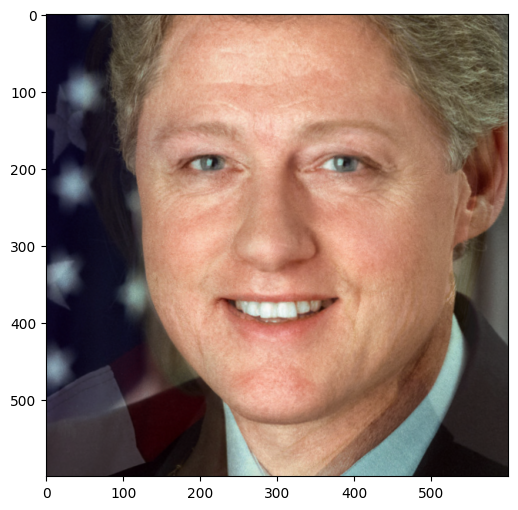

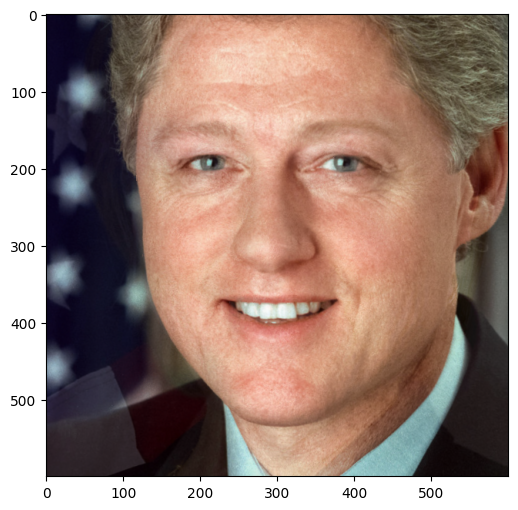

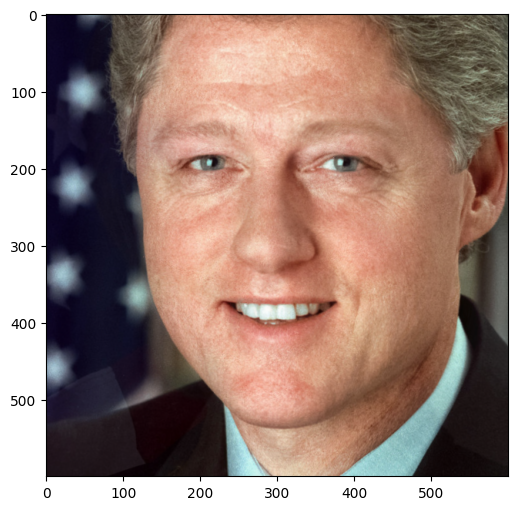

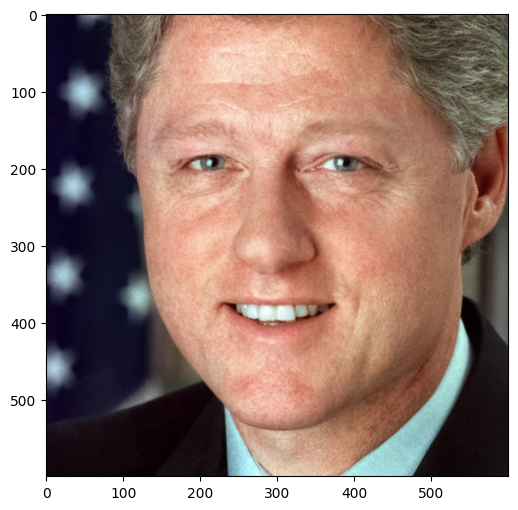

In [ ]:
# Start animation.

alpha = 0
increaseAlpha = True

while True:
    # Compute landmark points based on morphing parameter alpha
    # 𝑥𝑚=(1−𝛼)𝑥𝑖+𝛼𝑥𝑗
    pointsMorph = (1 - alpha) * points1 + alpha * points2

    # Warp images such that normalized points line up 
    # with morphed points.
    imOut1 = fbc.warpImage(imNorm1, points1, pointsMorph.tolist(), dt)
    imOut2 = fbc.warpImage(imNorm2, points2, pointsMorph.tolist(), dt)

    # Blend warped images based on morphing parameter alpha
    # 𝑦𝑚=(1−𝛼)𝑦𝑖+𝛼𝑦𝑗
    imMorph = (1 - alpha) * imOut1 + alpha * imOut2
    
    # Keep animating by ensuring alpha stays between 0 and 1.
    if (alpha <= 0 and not increaseAlpha):
        increaseAlpha = True
    if (alpha >= 1 and increaseAlpha):
        break
        increaseAlpha = False

    if increaseAlpha:
        alpha += 0.075
    else:
        alpha -= 0.075

    plt.imshow(imMorph[:,:,::-1])
    plt.show()